In this exercise, you will implement multiclass classification using logistic regression with one-vs-all, softmax regression and a neural network

# Multi-class Classification

In this exercise, you will implement multiclass classification using logistic regression with one-vs-all, softmax regression and a neural network. The goal is to recognize handwritten digits(from 0 to 9)
# 1 using one-vs-all
### 1.1 Dataset
the dataset is in the file ex3data1.mat file in the data folder and contains 5000 training examples of handwritten digits. the .mat format is a native matlab matrix format.

In [1]:
# import all external libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# load MATLAB files
from scipy.io import loadmat
from scipy.optimize import minimize

from sklearn.linear_model import LogisticRegression

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 

%matplotlib inline

### 1.2 Visualizing the data


X: (5000, 401) (with intercept)
y: (5000, 1)


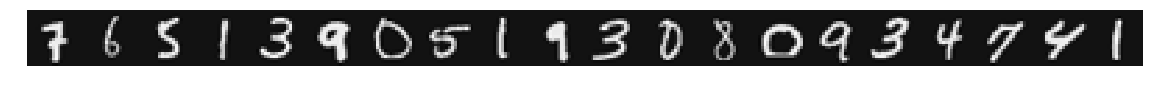

In [2]:
data = loadmat('data/ex3data1.mat')
weights = loadmat('data/ex3weights.mat')

y = data['y']

# Add constant for intercept
X = np.c_[np.ones((data['X'].shape[0],1)), data['X']]

print('X: {} (with intercept)'.format(X.shape))
print('y: {}'.format(y.shape))

sample = np.random.choice(X.shape[0], 20)
plt.figure(figsize=(20,15))
plt.imshow(X[sample,1:].reshape(-1,20).T, cmap='gray')
plt.axis('off');

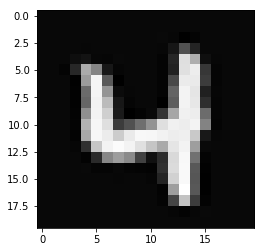

In [3]:
plt.imshow(X[2321,1:].reshape(-1,20).T, cmap='gray')

### implement the sigmoid function and hypothesis

In [4]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))


def hypothesis(X,theta):
    h = None
    
    ######## Your Code #######
    
    
    
    ####### End Code ########
    
    return h
    
    

### implement the regularized cost function and gradients for logistic regression

In [5]:
def lrcostFunctionReg(theta, reg, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = None
    
    ############# Your Code #############
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])
    ############# End Code ###############
    
    return J



def lrgradientReg(theta, reg, X,y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    grad = None
    
    ############# Your Code ####################
      
    grad = (1/m)*X.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

    ############# End Code ################
    return grad

## 1.4 One-vs-all Classification
In this part you are to implement one-vs-all classification in which you find a hypothesis for each of the classes and then select the class with maximum hypothesis

In [6]:
def oneVsAll(features, classes, n_labels, reg):
    initial_theta = np.zeros((X.shape[1],1))  # 401x1
    all_theta = np.zeros((n_labels, X.shape[1])) #10x401

    for c in np.arange(1, n_labels+1):
        res = minimize(lrcostFunctionReg, initial_theta, args=(reg, features, (classes == c)*1), method=None,
                       jac=lrgradientReg, options={'maxiter':50})
        all_theta[c-1] = res.x
    return(all_theta)

In [ ]:
theta = oneVsAll(X, y, 10, 0.1)

### 1.4.1 One-vs-all Prediction
You can now use the one-vs-all classifier to predict the digit contained in a given image.

In [ ]:
def predictOneVsAll(all_theta, features):
    probs = sigmoid(X.dot(all_theta.T))
        
    # Adding one because Python uses zero based indexing for the 10 columns (0-9),
    # while the 10 classes are numbered from 1 to 10.
    return(np.argmax(probs, axis=1)+1)


In [ ]:
pred = predictOneVsAll(theta, X)
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))

# 3 Neural Networks
You are now to implement multiclass classification using a neural network. logistic regression is only a linear classifier and cannot form a more complex hypothesis. 

### 3.1 Model representation
The model used is a 2 unit neural network with 25 hidden units. Hence the parameter/weight matrix for the first layer is 25 x 401, and that for the second layer is 10 x 401. <br/><br/>

The neural network model has already been trained using backpropagation all you have to do is to load the trained weights and use that to make predictions using forward propagation.


In [ ]:
weights = loadmat('data/ex3weights.mat')
weights.keys()

theta1, theta2 = weights['Theta1'], weights['Theta2']

print('theta1: {}'.format(theta1.shape))
print('theta2: {}'.format(theta2.shape))


### 2.2 Feedforward Propagation and Prediction

In [ ]:
def predict(X, theta1, theta2):
    z2 = theta1.dot(X.T)
    a2 = np.c_[np.ones((data['X'].shape[0],1)), sigmoid(z2).T]
    
    z3 = a2.dot(theta2.T)
    a3 = sigmoid(z3)
        
    return(np.argmax(a3, axis=1)+1)

In [ ]:
pred = predict(X,theta1, theta2)
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))

# Using Scikit-learn

In [ ]:
clf = LogisticRegression(C=10, penalty='l2', solver='liblinear')
clf.fit(X[:,1:],y.ravel())

pred2 = clf.predict(X[:,1:])
print('Training set accuracy: {} %'.format(np.mean(pred2 == y.ravel())*100))